In [54]:
### Imports
import numpy as np
import pandas as pd
import os
from os.path import join
import glob
import matplotlib.pyplot as plt

### 1. Import all data into pandas dataframe:

In [48]:
datafolder = join(os.getcwd()[:os.getcwd().index('Code')]) + 'Data/ashrae-energy-prediction/'
datafiles = glob.glob(datafolder + '*')
pd_weather_train = pd.DataFrame(pd.read_csv(datafolder + 'weather_train.csv'))
pd_train = pd.DataFrame(pd.read_csv(datafolder + 'train.csv'))
pd_bld_metadata = pd.DataFrame(pd.read_csv(datafolder + 'building_metadata.csv'))

### 2. Analyze Building metadata

In [49]:
pd_bld_metadata

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


#### 2.1. Primary use:

Seems like all data is present and this is the breakdown of how much data do we have from each cathegory. Mostly we have data from educational, office buildings, entertainment and public services.

In [65]:
primary_use_unique = pd_bld_metadata.primary_use.unique()
print(len(primary_use_unique))
print(pd_bld_metadata.primary_use.value_counts())

16
Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64


In [161]:
sum(pd_bld_metadata.primary_use.isnull())

0

#### 2.2 Year built:

This is how the histogram for the year built looks like. I am also printing the number of null values in the column. It seems like half of the data is missing here.

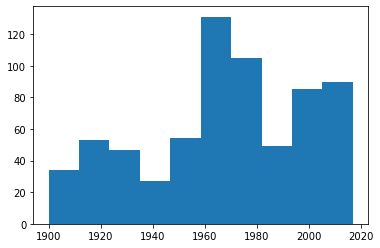

774

In [66]:
plt.hist(pd_bld_metadata.year_built)
plt.show()
sum(pd_bld_metadata.year_built.isnull())

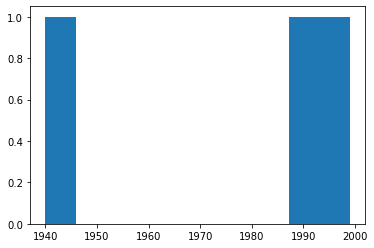

1976.3333333333333


In [111]:
plt.hist(pd_bld_metadata[['primary_use','year_built']][pd_bld_metadata.primary_use == primary_use_unique[12]].year_built)
plt.show()
print(np.mean(pd_bld_metadata[['primary_use','year_built']][pd_bld_metadata.primary_use == primary_use_unique[12]].year_built))

#### 2.3. Square feet:

This data seems to be present for all the entries.

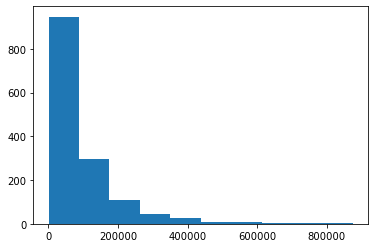

0

In [80]:
plt.hist(pd_bld_metadata.square_feet)
plt.show()
sum(pd_bld_metadata.square_feet.isnull())

#### 2.4. Floor count:

This data is missing at most places. 

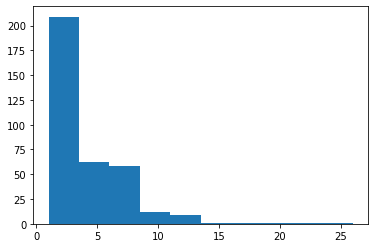

1094

In [84]:
plt.hist(pd_bld_metadata.floor_count)
plt.show()
sum(pd_bld_metadata.floor_count.isnull())

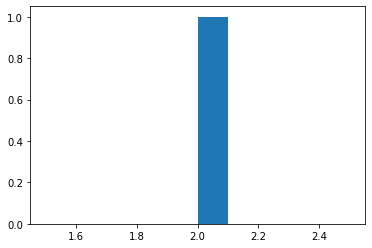

285     NaN
606     2.0
1364    NaN
1425    NaN
Name: floor_count, dtype: float64


In [113]:
plt.hist(pd_bld_metadata[['primary_use','floor_count']][pd_bld_metadata.primary_use == primary_use_unique[12]].floor_count)
plt.show()
print(pd_bld_metadata[['primary_use','floor_count']][pd_bld_metadata.primary_use == primary_use_unique[12]].floor_count)

In [162]:
pd_bld_metadata[['primary_use','floor_count']].groupby('primary_use').mean()

,floor_count
primary_use,
Education,4.732558
Entertainment/public assembly,2.089286
Food sales and service,NaN
Healthcare,1.000000
Lodging/residential,6.333333
Manufacturing/industrial,1.666667
Office,3.725000
Other,1.076923
Parking,2.666667


### 3. Analyze weather train data:

In [119]:
pd_weather_train

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


#### 3.0. Site_id:

In [160]:
print(pd_weather_train.site_id)
print("Number of null values: " + str(sum(pd_weather_train.site_id.isnull())))

0          0
1          0
2          0
3          0
4          0
          ..
139768    15
139769    15
139770    15
139771    15
139772    15
Name: site_id, Length: 139773, dtype: int64
Number of null values: 0


#### 3.1. Timestamp

We have all the timestamps data and they are all in 1h increment

In [124]:
print(pd_weather_train.timestamp)
print("Number of null values: " + str(sum(pd_weather_train.timestamp.isnull())))

0         2016-01-01 00:00:00
1         2016-01-01 01:00:00
2         2016-01-01 02:00:00
3         2016-01-01 03:00:00
4         2016-01-01 04:00:00
                 ...         
139768    2016-12-31 19:00:00
139769    2016-12-31 20:00:00
139770    2016-12-31 21:00:00
139771    2016-12-31 22:00:00
139772    2016-12-31 23:00:00
Name: timestamp, Length: 139773, dtype: object
Number of null values: 0


#### 3.2. Air temperature:

Air temperature seems to be missing at only few places. We can put the average of temeprature of neighbouring cells in this case to fill the missing information.

0         25.0
1         24.4
2         22.8
3         21.1
4         20.0
          ... 
139768     3.0
139769     2.8
139770     2.8
139771     2.2
139772     1.7
Name: air_temperature, Length: 139773, dtype: float64
55


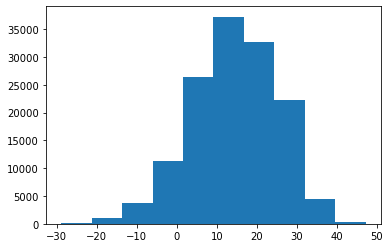

In [139]:
print(pd_weather_train.air_temperature)
print(sum(pd_weather_train.air_temperature.isnull()))
plt.hist(pd_weather_train.air_temperature)
plt.show()

In [137]:
np.transpose(pd_weather_train[pd_weather_train['air_temperature'].isnull()].index.tolist())

array([   368,    369,    370,  15763,  22349,  27393,  30910,  30911,
        30914,  50108,  51626,  57294,  60248,  60250,  60251,  60649,
        60650,  61149,  61150,  61151,  61152,  70412,  70413,  70414,
        79037,  79279,  79303,  79421,  81327,  92858,  94210,  94211,
        94212,  94213,  94214,  94215,  94216,  94217,  94218,  94219,
        94220,  94230,  94234,  94235,  94236,  94237,  94238,  94239,
        94240,  94241,  94242,  94243,  94245, 115739, 126458])

#### 3.3. Cloud_coverage:

For cloud coverage we are missing ~50% of the data. Possibly we could replace missing data by randomly drawing out of distribution.

0         6.0
1         NaN
2         2.0
3         2.0
4         2.0
         ... 
139768    NaN
139769    2.0
139770    NaN
139771    NaN
139772    NaN
Name: cloud_coverage, Length: 139773, dtype: float64
Number of null values: 69173


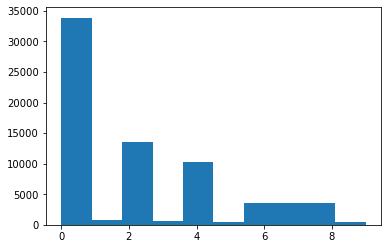

In [142]:
print(pd_weather_train.cloud_coverage)
print("Number of null values: " + str(sum(pd_weather_train.cloud_coverage.isnull())))
plt.hist(pd_weather_train.cloud_coverage)
plt.show()

#### 3.4 Dew temperature:

Since we only have handfull amount of missing data in this column we can replace missing data here with average of the fields around.

0         20.0
1         21.1
2         21.1
3         20.6
4         20.0
          ... 
139768    -8.0
139769    -8.9
139770    -7.2
139771    -6.7
139772    -5.6
Name: dew_temperature, Length: 139773, dtype: float64
Number of null values: 113


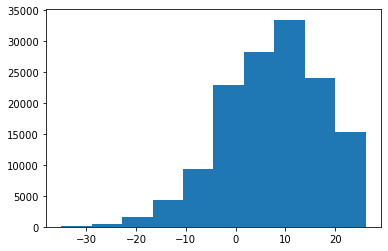

In [143]:
print(pd_weather_train.dew_temperature)
print("Number of null values: " + str(sum(pd_weather_train.dew_temperature.isnull())))
plt.hist(pd_weather_train.dew_temperature)
plt.show()

#### 3.5. Precipitation depth 1h:

What does this field even mean? We are missing a lot of this data, we could replace by randomly drawing from the distribution. What is the advantage of that method over filling the missing data with mean?

0         NaN
1        -1.0
2         0.0
3         0.0
4        -1.0
         ... 
139768    NaN
139769    NaN
139770    NaN
139771    NaN
139772   -1.0
Name: precip_depth_1_hr, Length: 139773, dtype: float64
Number of null values: 50289


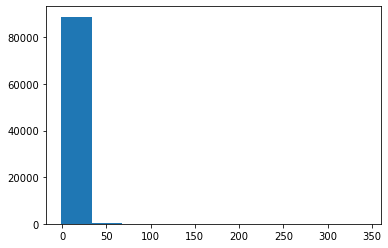

In [144]:
print(pd_weather_train.precip_depth_1_hr)
print("Number of null values: " + str(sum(pd_weather_train.precip_depth_1_hr.isnull())))
plt.hist(pd_weather_train.precip_depth_1_hr)
plt.show()

#### 3.6. Sea level pressure:

This one I believe would be slower scale on which it changes compared to wind? So possibly replacing with mean of this distribution would work.
Technically this would be a way to do it: other=(df.fillna(method='ffill') + df.fillna(method='bfill'))/2)

0         1019.7
1         1020.2
2         1020.2
3         1020.1
4         1020.0
           ...  
139768       NaN
139769    1007.4
139770    1007.5
139771    1008.0
139772    1008.5
Name: sea_level_pressure, Length: 139773, dtype: float64
Number of null values: 10618


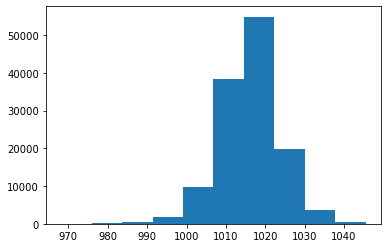

In [145]:
print(pd_weather_train.sea_level_pressure)
print("Number of null values: " + str(sum(pd_weather_train.sea_level_pressure.isnull())))
plt.hist(pd_weather_train.sea_level_pressure)
plt.show()

#### 3.7. Wind direction:

This one seems to have relatively small number of missing values. I think I could do mean of non-zero neighbouring values as a input for these missing pieces.

0           0.0
1          70.0
2           0.0
3           0.0
4         250.0
          ...  
139768    180.0
139769    180.0
139770    180.0
139771    170.0
139772    180.0
Name: wind_direction, Length: 139773, dtype: float64
Number of null values: 6268


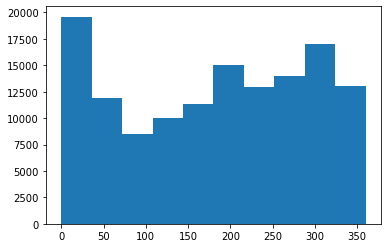

In [146]:
print(pd_weather_train.wind_direction)
print("Number of null values: " + str(sum(pd_weather_train.wind_direction.isnull())))
plt.hist(pd_weather_train.wind_direction)
plt.show()

#### 3.8. Wind speed:

0         0.0
1         1.5
2         0.0
3         0.0
4         2.6
         ... 
139768    5.7
139769    7.7
139770    5.1
139771    4.6
139772    8.8
Name: wind_speed, Length: 139773, dtype: float64
Number of null values: 304


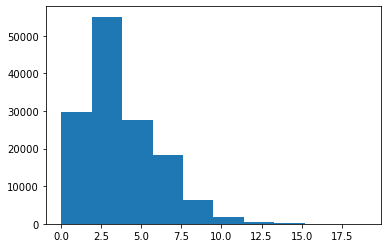

In [147]:
print(pd_weather_train.wind_speed)
print("Number of null values: " + str(sum(pd_weather_train.wind_speed.isnull())))
plt.hist(pd_weather_train.wind_speed)
plt.show()

### 4. Analyze train data:

In [148]:
pd_train

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


#### 4.1. Meter:

This part contains no nulls.

0           0
1           0
2           0
3           0
4           0
           ..
20216095    0
20216096    0
20216097    0
20216098    0
20216099    0
Name: meter, Length: 20216100, dtype: int64
Number of null values: 0


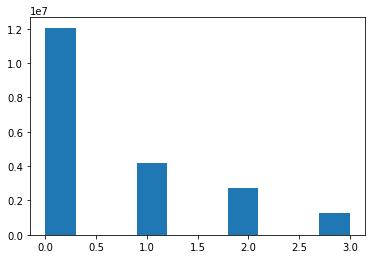

In [151]:
print(pd_train.meter)
print("Number of null values: " + str(sum(pd_train.meter.isnull())))
plt.hist(pd_train.meter)
plt.show()

#### 4.2. Timestamp:

Timestamp here is also taken every 1h. We could connect this with weather timestamp then with just connecting two pandas over side id.

In [152]:
print(pd_train.timestamp)
print("Number of null values: " + str(sum(pd_train.timestamp.isnull())))

0           2016-01-01 00:00:00
1           2016-01-01 00:00:00
2           2016-01-01 00:00:00
3           2016-01-01 00:00:00
4           2016-01-01 00:00:00
                   ...         
20216095    2016-12-31 23:00:00
20216096    2016-12-31 23:00:00
20216097    2016-12-31 23:00:00
20216098    2016-12-31 23:00:00
20216099    2016-12-31 23:00:00
Name: timestamp, Length: 20216100, dtype: object
Number of null values: 0


In [159]:
pd_train.timestamp.unique()[:3]

array(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
       '2016-01-01 02:00:00'], dtype=object)

In [166]:
pd.merge(pd.merge(pd_bld_metadata,pd_weather_train, on = ['site_id']), pd_train, on = ['building_id', "timestamp"])

,site_id,building_id,primary_use,square_feet,year_built,floor_count,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,meter,meter_reading
0,0,0,Education,7432,2008.0,NaN,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,0.000
1,0,0,Education,7432,2008.0,NaN,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,0,0.000
2,0,0,Education,7432,2008.0,NaN,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,0,0.000
3,0,0,Education,7432,2008.0,NaN,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,0,0.000
4,0,0,Education,7432,2008.0,NaN,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20125600,15,1448,Office,92271,2001.0,NaN,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7,0,3.400
20125601,15,1448,Office,92271,2001.0,NaN,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7,0,2.700
20125602,15,1448,Office,92271,2001.0,NaN,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1,0,3.050
20125603,15,1448,Office,92271,2001.0,NaN,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6,0,3.125


### 5. Make a function that loads data and fills NAs and combines them all:

In [295]:
def process_data(datafolder):
    """
    This function takes folder name where we keep data for
    Building Energy consumption project and returns a pandas
    dataframe with all the data that was processed for the NA
    values.
    """
    
    # IMPORT DATA:
    # Import weather train data, train data and building metadata
    pd_weather_train = pd.DataFrame(pd.read_csv(datafolder + 'weather_train.csv'))
    pd_train = pd.DataFrame(pd.read_csv(datafolder + 'train.csv'))
    pd_bld_metadata = pd.DataFrame(pd.read_csv(datafolder + 'building_metadata.csv'))
    #---------------------------------------------------------------------------------
    # FIX NA VALUES:
    
    # Fix weather train data NA by taking the average of neighbouring cells:
    pd_weather_train.loc[:, pd_weather_train.columns != 'timestamp'] = (pd_weather_train.loc[:, pd_weather_train.columns != 'timestamp'].fillna(method = 'ffill')+ pd_weather_train.loc[:, pd_weather_train.columns != 'timestamp'].fillna(method = 'bfill'))/2
    pd_weather_train = pd_weather_train.fillna(method = 'ffill').fillna(method='bfill')
    
    # Fix building metadata NA by substituting it with the mean its primary_use group:
    pd_bld_metadata[['year_built','floor_count']] = pd_bld_metadata.groupby('primary_use')[['year_built','floor_count']].transform(lambda x: x.fillna((x.mean())))
    pd_bld_metadata.year_built = pd_bld_metadata.year_built.fillna(pd_bld_metadata.year_built.mean())
    pd_bld_metadata.floor_count = pd_bld_metadata.floor_count.fillna(pd_bld_metadata.floor_count.mean())
    pd_bld_metadata = round(pd_bld_metadata)
    
    # Train data seems to have no NA values so I won't fix those
    #---------------------------------------------------------------------------------
    # COMBINE ALL DATA:
    # Combine all data into one pandas dataframe:
    pd_weather_building = pd.merge(pd_bld_metadata, pd_weather_train, on = ['site_id'])
    pd_all = pd.merge(pd_weather_building, pd_train, on = ['building_id', "timestamp"])
    
    return pd_all
    
    

In [284]:
pd_weather_train = pd.DataFrame(pd.read_csv(datafolder + 'weather_train.csv'))
pd_train = pd.DataFrame(pd.read_csv(datafolder + 'train.csv'))
pd_bld_metadata = pd.DataFrame(pd.read_csv(datafolder + 'building_metadata.csv'))

#pd_bld_metadata.fillna(pd_bld_metadata.groupby('primary_use').mean())

In [285]:
pd_bld_metadata[['year_built','floor_count']] = pd_bld_metadata.groupby('primary_use')[['year_built','floor_count']].transform(lambda x: x.fillna((x.mean())))
pd_bld_metadata.year_built = pd_bld_metadata.year_built.fillna(pd_bld_metadata.year_built.mean())
pd_bld_metadata.floor_count = pd_bld_metadata.floor_count.fillna(pd_bld_metadata.floor_count.mean())
pd_bld_metadata = round(pd_bld_metadata)

In [ ]:
pd.merge(pd.merge(pd_bld_metadata,pd_weather_train, on = ['site_id']), pd_train, on = ['building_id', "timestamp"])

In [300]:
pd_all = process_data(datafolder)
pd_all

,site_id,building_id,primary_use,square_feet,year_built,floor_count,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,meter,meter_reading
0,0,0,Education,7432,2008.0,5.0,2016-01-01 00:00:00,25.0,6.0,20.0,-1.0,1019.70,0.0,0.0,0,0.000
1,0,0,Education,7432,2008.0,5.0,2016-01-01 01:00:00,24.4,4.0,21.1,-1.0,1020.20,70.0,1.5,0,0.000
2,0,0,Education,7432,2008.0,5.0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.20,0.0,0.0,0,0.000
3,0,0,Education,7432,2008.0,5.0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.10,0.0,0.0,0,0.000
4,0,0,Education,7432,2008.0,5.0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.00,250.0,2.6,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20125600,15,1448,Office,92271,2001.0,4.0,2016-12-31 19:00:00,3.0,1.0,-8.0,-1.0,1007.55,180.0,5.7,0,3.400
20125601,15,1448,Office,92271,2001.0,4.0,2016-12-31 20:00:00,2.8,2.0,-8.9,-1.0,1007.40,180.0,7.7,0,2.700
20125602,15,1448,Office,92271,2001.0,4.0,2016-12-31 21:00:00,2.8,2.0,-7.2,-1.0,1007.50,180.0,5.1,0,3.050
20125603,15,1448,Office,92271,2001.0,4.0,2016-12-31 22:00:00,2.2,2.0,-6.7,-1.0,1008.00,170.0,4.6,0,3.125
